# Oddstradamus
### Good odds and where to find them

To bring the project to a fitting conclusion, in this notebook we first look at the results of the modelling before ultimately presenting the recommendations regarding the long-term strategy and providing starting points for further research. 

### Results Modelling

In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# load the data
df = pd.read_csv('Data/results_models.csv', delimiter=";", decimal=',')

In [3]:
# assign palettes
palette_g = 'BuGn_r'
palette_r = 'Reds'

In [4]:
# split the data between home and away
home = df[df['notebook'] == 'Home']
away = df[df['notebook'] == 'Away']

#### Full-Dataframe

First, let's take a look at the performance of the models on the first dataframe. This included all the games that remained in the dataframe after cleaning, i.e. a total of almost 42,000 games. The performance on this dataframe was ultimately not convincing. Despite a risk-averse betting strategy, no positive profit could be achieved in either the Home or the Away Model. Accordingly, no recommendation can be made to bet on any matches without making a pre-selection.

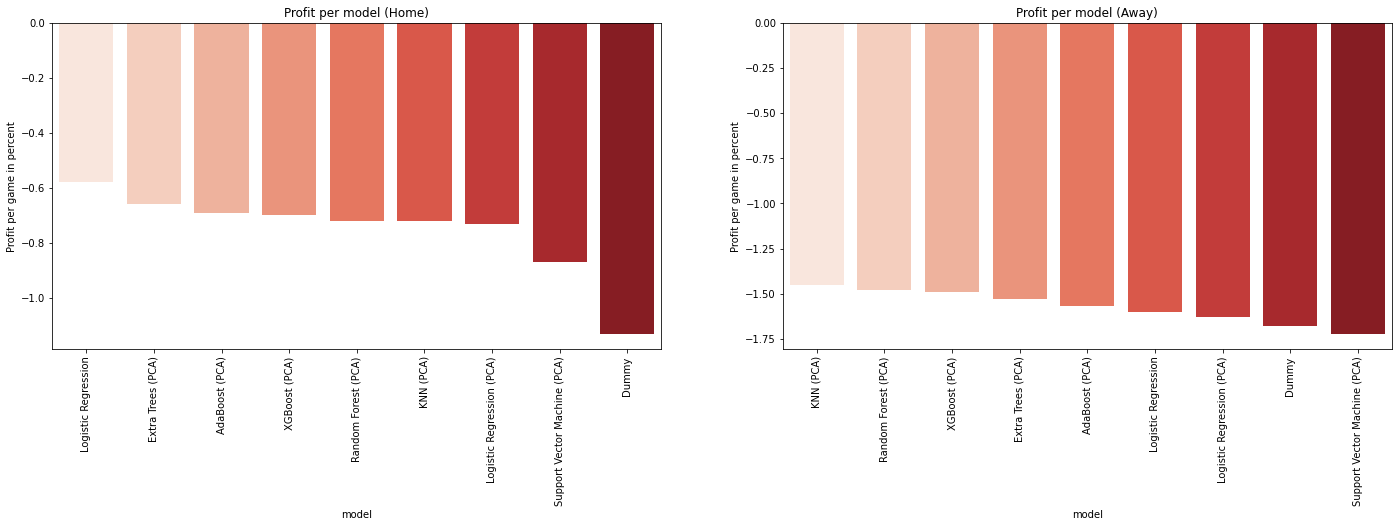

In [5]:
# plot the results of the first dataframe
full_h = home[home['dataset'] == 'Full']
full_a = away[away['dataset'] == 'Full']

fig, axs = plt.subplots(ncols=2, figsize=(24, 6))
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
axs[0].set_title('Profit per model (Home)'), axs[1].set_title('Profit per model (Away)')
sns.barplot(x = full_h['model'], y = df['risk-averse'], data = df, order = full_h.sort_values('risk-averse', ascending=False).model, palette = palette_r, ax = axs[0])
sns.barplot(x = full_a['model'], y = df['risk-averse'], data = df, order = full_a.sort_values('risk-averse', ascending=False).model, palette = palette_r, ax = axs[1])
axs[0].set(ylabel = 'Profit per game in percent'), axs[1].set(ylabel = 'Profit per game in percent');

#### 50% Dataframe

The performance of the second data frame was also not particularly pleasing. The home dataset only contained matches where the bookmakers calculated the probability of a home win with a three-way result to be at least 50%. Simultaneously, the away dataset contained only matches where the probability of an away win was calculated to be at least 50%. These data sets also performed better on the risk-averse betting model. While the expected profit in the _home models_ is at least mostly in the positive range, the models on the _away models_, with one exception, continue to perform in the negative range. The recommendation in this context is therefore to bet mainly on home wins, provided the odds of the favourite are below 2.0. However, this tactic should also not lead to unexpected wealth.

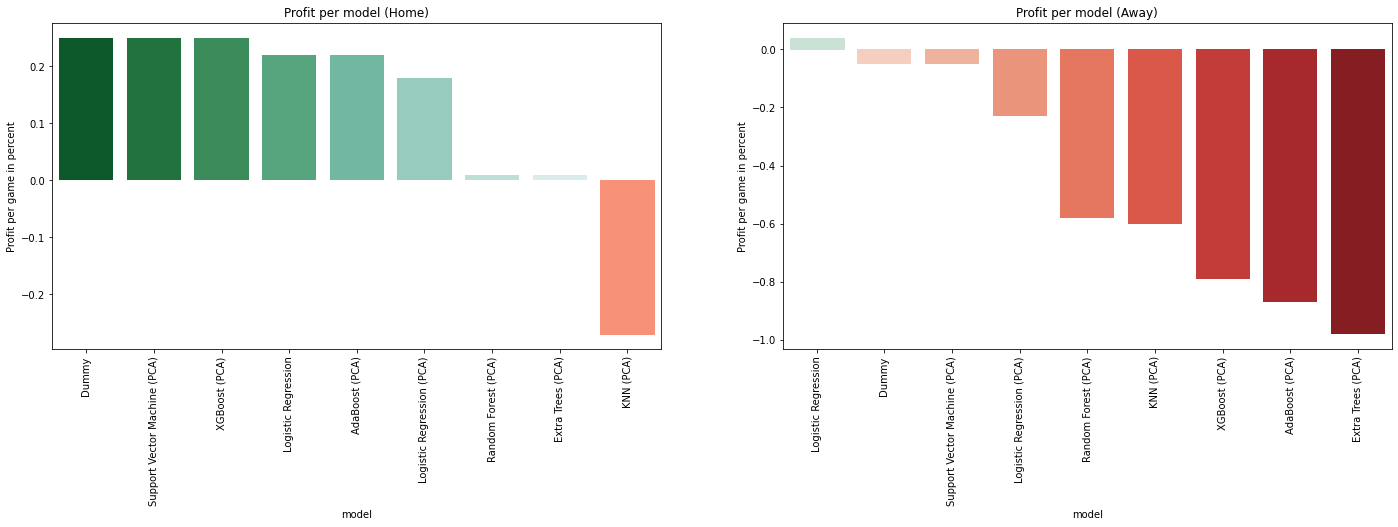

In [6]:
# plot the results of the second dataframe
proba_h = home[home['dataset'] == '50']
proba_a = away[away['dataset'] == '50']

fig, axs = plt.subplots(ncols=2, figsize=(24, 6))
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)

axs[0].set_title('Profit per model (Home)'), axs[1].set_title('Profit per model (Away)')
sns.barplot(x = proba_h['model'], y = 'risk-averse', data = df, order = proba_h.sort_values('risk-averse', ascending=False).model, palette = palette_g, ax = axs[0])
sns.barplot(x = proba_a['model'], y = 'risk-averse', data = df, order = proba_a.sort_values('risk-averse', ascending=False).model, palette = palette_r, ax = axs[1])
axs[0].set(ylabel = 'Profit per game in percent'), axs[1].set(ylabel = 'Profit per game in percent')
for bar in axs[0].patches:
    if bar.get_height() < 0:
        bar.set_color('#F79178')
for bar in axs[1].patches:
    if bar.get_height() > 0:
        bar.set_color('#CAE2D6');

#### Favorite-Dataframe

Finally, we examine the results of the favourite data frame. In the associated _Home dataset_, there were only games whose favourite in home games was calculated with an average probability of winning of more than 65%. This corresponds roughly to odds of 1.55. In other words, the favourite in these matches receives lower odds than 1.55 for a home win on average. On the _away dataset_, the border performed best at odds of 1.65. This represents an average calculated probability of at least 60% for an away win. Both the home and away models produced consistently positive results in this way. Surprisingly, the performance regarding the prediction of away matches of the favourites was clearly better than the performance of the prediction of home matches of the favourites. The best value on the _home models_ was achieved by the KNN with a profit of almost 2,98% per period. In the away models, the logistic regression achieved the best value, which was ultimately 9,29% profit per period. It is also noteworthy that even the handy dummy classifier performed very well in terms of profit. This predicted every game as an away win and, in addition to an accuracy of 67%, achieved a profit of 8.14% per period. This fact shows how important game selection can be and how good results can be achieved even without the use of machine learning algorithms. 

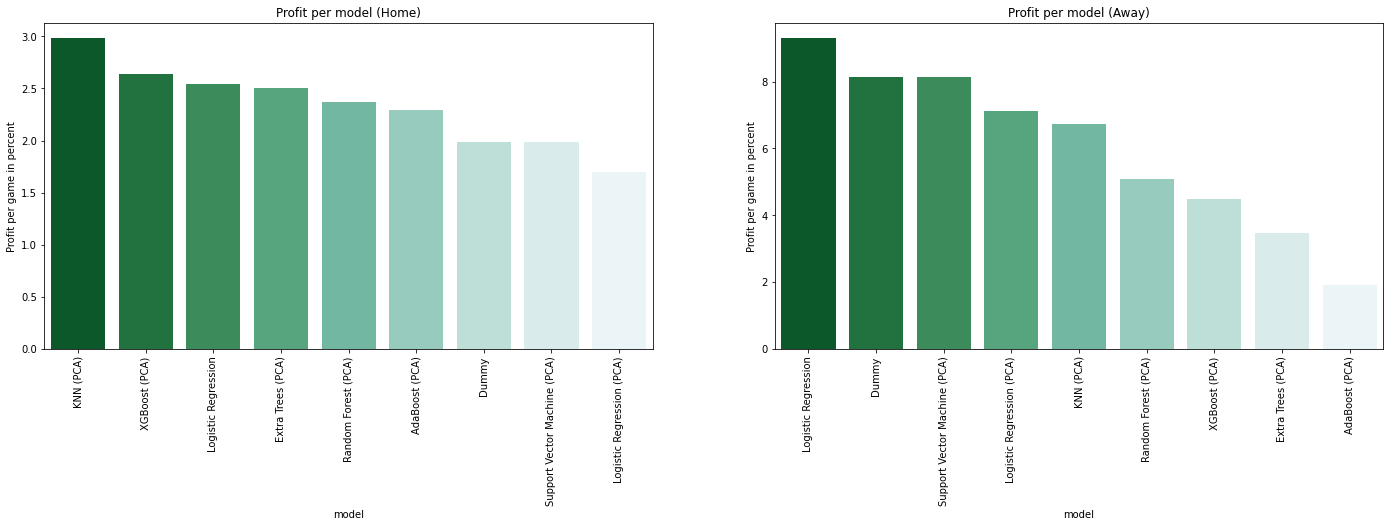

In [7]:
# plot the results of the third dataframe
fav_h = home[home['dataset'] == 'Favorite 1,55']
fav_a = away[away['dataset'] == 'Favorite 1,65']

fig, axs = plt.subplots(ncols=2, figsize=(24, 6))
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)


axs[0].set_title('Profit per model (Home)'), axs[1].set_title('Profit per model (Away)')
sns.barplot(x = fav_h['model'], y = 'risk-taking', data = df, order = fav_h.sort_values('risk-taking', ascending=False).model, palette = palette_g, ax = axs[0])
sns.barplot(x = fav_a['model'], y = 'risk-taking', data = df, order = fav_a.sort_values('risk-taking', ascending=False).model, palette = palette_g, ax = axs[1])
axs[0].set(ylabel = 'Profit per game in percent'), axs[1].set(ylabel = 'Profit per game in percent')
plt.savefig('results.png');

In summary, it can be said that it was possible to develop a profitable long-term strategy with the help of machine learning algorithms. However, it could also be determined that the pre-selection of the games on the one hand and the selection of the right stake per bet on the other hand are of essential importance. Consequently, without the right interaction of these disciplines, it would not have been possible to achieve a profitable result.

### Recommendations

The recommendations that can be made after the completion of this project are summarised once in a simplified way:

#### General:
- Single match betting
- Choose a tax-free betting provider
- Do not change the betting unit within a period

#### Match selection:

| Home matches of these teams | Away matches of these teams |
| - | - |
| Ajax Amsterdam | Ajax Amsterdam |
| FC Barcelona | FC Barcelona |
| Bayern München | Bayern München |
| Benfica Lissabon | Benfica Lissabon |
| Celtic Glasgow | Celtic Glasgow |
| Cove Rangers| Cove Rangers |
| Borussia Dortmund | Paris SG |
| Feyenoord Rotterdam | FC Porto |
| Galatasaray Istanbul | |
| Juventus Turin | |
| Manchester City | |
| SSC Neapel | |
| Olympiakos Piräus | |
| PAOK Saloniki | |
| PSV Eindhoven | |
| Paris SG | |
| FC Porto | |
| Real Madrid | |


#### Match prediction:
- Home matches:
    - In the best case: Using the KNN (2.98% profit)
    - Handy alternative: Always bet on a home win (1.98% profit)
    
- Away matches:
    - In the best case: Using logistic regression (9.29% profit)
    - Handy alternative: Always bet on an away win (8.14% profit)


#### Stake per bet:
- act like the risk-taking profit-metric
- in this context, this means: _unit of stake_ multiplied by the _calculated probability of occurrence_ as stake.
- Example: 
    - Set €10 as the _unit of stake_
    - Odds are 1.7
    - Calculation of the stake: 10€ * (1/1.7) = 5.88€.
    - 5,88€ as optimal stake for this bet

### Limitation

Although a performance of 9.29% profit is remarkable, it should not be ignored in this context that the preselection imposes a considerable restriction on the number of suitable matches. In the end, a number of 764 games distributed over a total of 8 seasons remained in the _away dataset_. Accordingly, the number of matches per week is small, so that the law of large numbers does not necessarily apply and thus strong deviations from the forecast can occur in some cases. To counteract this, other datasets were tested for their suitability. A dataset with a similar pattern of games in which the favourite receives average odds of a maximum of 1.8 performed somewhat worse, but was able to almost double the number of games. In this case, it must therefore be weighed up which strategy ultimately represents the better decision.

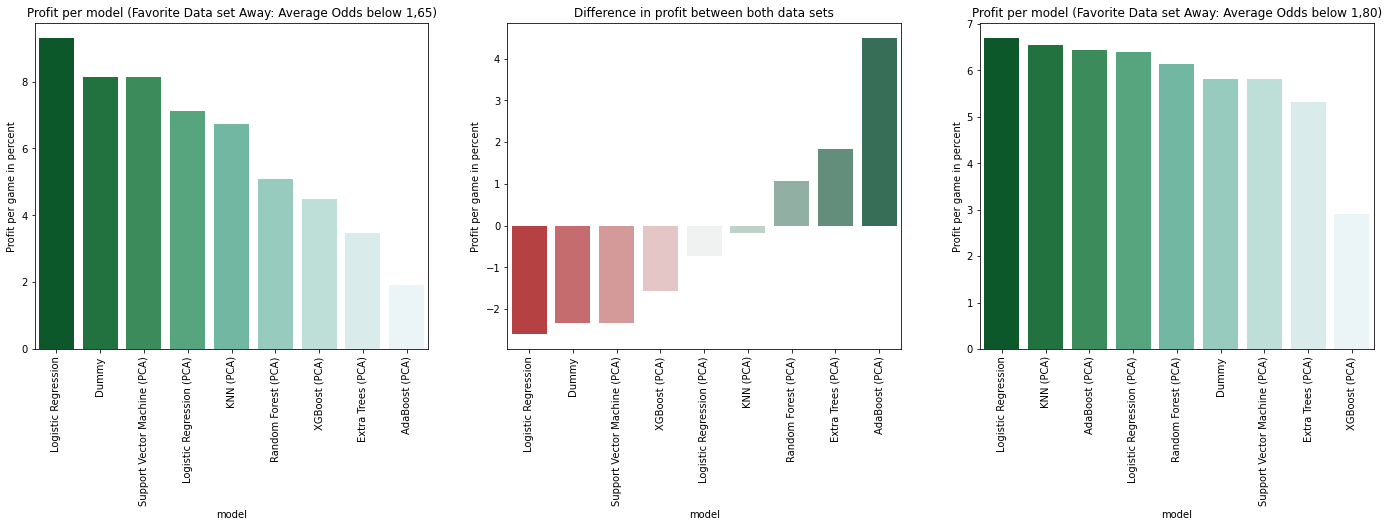

In [8]:
# plot the difference between the two best favorite dataframes
fav_a_80 = away[away['dataset'] == 'Favorite 1,80']

profit_180 = fav_a_80['risk-taking']
profit_165 = fav_a['risk-taking']
diff_profit = profit_180.values - profit_165.values

fig, axs = plt.subplots(ncols=3, figsize=(24, 6))
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=90)
    
order = ['Logistic Regression', 'Dummy', 'Support Vector Machine (PCA)', 'XGBoost (PCA)', 'Logistic Regression (PCA)', 'KNN (PCA)', 'Random Forest (PCA)', 'Extra Trees (PCA)', 'AdaBoost (PCA)']
palette_plot = sns.diverging_palette(12, 150, s=80, l=45, n=9)

axs[0].set_title('Profit per model (Favorite Data set Away: Average Odds below 1,65)'), axs[1].set_title('Difference in profit between both data sets'), axs[2].set_title('Profit per model (Favorite Data set Away: Average Odds below 1,80)')
sns.barplot(x = fav_a['model'], y = 'risk-taking', data = df, order = fav_a.sort_values('risk-taking', ascending=False).model, palette = palette_g, ax = axs[0])
sns.barplot(x = fav_a['model'], y = diff_profit, data = df, order = order, palette = palette_plot, ax = axs[1])
sns.barplot(x = fav_a_80['model'], y = 'risk-taking', data = df, order = fav_a_80.sort_values('risk-taking', ascending=False).model, palette = palette_g, ax = axs[2])
for i in range(3):
         axs[i].set(ylabel = 'Profit per game in percent');

### Further Work

The optimisation of the strategy is far from complete. The problem offers a multitude of further starting points that require closer examination. Such aspects are listed below as examples:


- Optimisation of the individual algorithms not yet completed. Improvement potential of the hyperparameters not exhausted.
- Inclusion of further data or features (e.g. ball possession, odd fluctuations or teams in direct duels).
- Investigation of other target variables. Practically every playable bet conceivable.
- Examine game selection with regard to the underdog tip. Are profitable wins also possible on a regular basis using ML in this area?
- Develop different approaches to the optimal choice of betting stake.
- ...
